### group-by

I'm trying to figure out how to group the pen data. Initially by date created, so we can see things like how many objects were collected for a given day of the week.

In [1]:
## read in the data as a pandas object
import pandas as pd
pen_df = pd.read_csv('../the-pen-data/data/pen-collected-items.csv')

## show the first 10 rows
pen_df[:10]

,id,tool_id,bundle_id,refers_to_object_id,created
0,0,0,54Sa,18356743,1414081555
1,1,0,54ZB,18316213,1414432504
2,2,0,55ap,18637615,1414526581
3,3,0,55ap,18643273,1414526584
4,4,0,55bK,18448597,1414529537
5,5,0,55cZ,18319373,1414530977
6,6,0,55cZ,18653811,1414530973
7,7,0,55gr,18481649,1414536158
8,8,0,55gr,18575263,1414536160
9,9,0,55ji,18346169,1414617054


In [2]:
## convert the unix timestamp to a datetime object

pen_df['created'] = pd.to_datetime(pen_df['created'].astype(int), unit='s')
pen_df

,id,tool_id,bundle_id,refers_to_object_id,created
0,0,0,54Sa,18356743,2014-10-23 16:25:55
1,1,0,54ZB,18316213,2014-10-27 17:55:04
2,2,0,55ap,18637615,2014-10-28 20:03:01
3,3,0,55ap,18643273,2014-10-28 20:03:04
4,4,0,55bK,18448597,2014-10-28 20:52:17
5,5,0,55cZ,18319373,2014-10-28 21:16:17
6,6,0,55cZ,18653811,2014-10-28 21:16:13
7,7,0,55gr,18481649,2014-10-28 22:42:38
8,8,0,55gr,18575263,2014-10-28 22:42:40
9,9,0,55ji,18346169,2014-10-29 21:10:54


In [3]:
## group the created column by 'dayofweek'
groups = pen_df.groupby(pen_df['created'].dt.dayofweek)

## show the results using the describe function
groups['created'].describe()

created        
0        count                  430856
         unique                 270017
         top       2016-02-15 21:05:20
         freq                       74
         first     2014-10-27 17:55:04
         last      2016-02-15 22:58:35
1        count                  425680
         unique                 274933
         top       2015-05-05 15:03:02
         freq                       28
         first     2014-10-28 20:03:01
         last      2016-02-09 22:36:05
2        count                  416348
         unique                 267415
         top       2016-02-10 16:30:24
         freq                       37
         first     2014-10-29 21:10:54
         last      2016-02-10 22:23:15
3        count                  392786
         unique                 259895
         top       2016-02-11 20:48:55
         freq                       37
         first     2014-10-23 16:25:55
         last      2016-02-11 21:53:28
4        count                  468226
         

In [4]:
## show just the size info for each day of the week.
created = groups['created']
created.size()


created
0    430856
1    425680
2    416348
3    392786
4    468226
5    781338
6    684501
dtype: int64

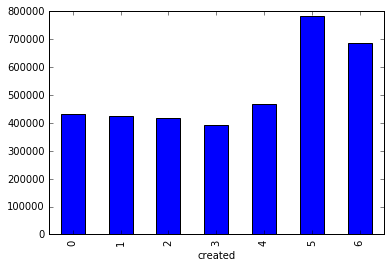

In [5]:
## plot the results of the dayofweek grouping. Monday = 0, Sunday = 6
%matplotlib inline

created.size().plot('bar')